In [2]:

# All import statements in this cell
import json
import sklearn
from sklearn import linear_model
import string
import math
from sklearn.naive_bayes import MultinomialNB
import gzip
import pickle
import nltk
from sklearn.feature_extraction.text import CountVectorizer
#nltk.download()
import numpy as np

from nltk.corpus import stopwords
import pandas as pd
# pip install vaderSentiment
# pip install requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

def getgzip(gzipfilepath):
  gggg = gzip.open(gzipfilepath, 'rb')

  for bytedata in gggg:
        
    yield eval(bytedata)

def getDataFrame(gzipfilepath):
  k = 0
  mydf = {}
  for bytedata in getgzip(gzipfilepath):
    mydf[k] = bytedata
    k += 1
  mydf =  pd.DataFrame.from_dict(mydf, orient='index')
  return mydf



def processText(text):
    
    noPunctuation = [c for c in text if c not in string.punctuation]
    noPunctuation = ''.join(noPunctuation)
    
    return [w for w in noPunctuation.split() if w.lower() not in stopwords.words('english')]

# trainning model using dataset
def train_model_using_dataset(filename):
    df = getDataFrame(filename)
    # cleaning the data such that we are taking only those values where denominator is not 0
    cleaned_data = []
    d = df.T.to_dict().values()
    for data in d:
        if data['helpful'][1] != 0:
            cleaned_data.append(data)
    df = pd.DataFrame(cleaned_data)
    # end
    
    # calculating whether review is useful or not
    useful = []

    for data in cleaned_data:
        score = data['helpful'][0] / data['helpful'][1]

        if score < 0.5:
            useful.append(0)
        else:
            useful.append(1)

    df['is_useful'] = useful
    # end
    
    
    bow_transformer = CountVectorizer(analyzer=processText).fit(list(df['reviewText']))
    X = bow_transformer.transform(df['reviewText'])
    y = df['is_useful']
    
    nb = MultinomialNB()
    #nb.fit(X, y)
    nb = nb.partial_fit(X, y, np.unique(y))
    return nb, bow_transformer
    
    


In [4]:
# Saving the model to a file
def save_Amazon_Reviewer_Model(nb, filename):
    
    pickle.dump(nb, open(filename,"wb"))

In [5]:
# Loading the model from a file
def load_Amazon_Reviewer_Model(filename):
    model = pickle.load(open(filename,"rb"))
    return model

In [6]:
def train_model_using_artificial_intelligence(model, reviewText, is_useful):
    
    bow_transformer = CountVectorizer(analyzer=text_process).fit(list(['reviewText']))
    X = bow_transformer.transform([reviewText])
    y = [is_useful]
    
    model.partial_fit(X, y, np.array([0,1]))
    
    return model, bow_transformer
    
    
    

In [ ]:
def get_sentiment(textt):
    vader_model = SentimentIntensityAnalyzer()
    value = vader_model.polarity_scores(textt)
    compound_value = value['compound']
    #print("{:-<40} {}".format(sentence, str(compound_value)))
    if compound_value >= 0.05:
        return "Positive sentiment"
    
    if compound_value < 0.05 and compound_value > -0.05:
        return "Neutral sentiment"
    
    if compound_value <= -0.05:
        return "Negative sentiment"

In [7]:
print('Training...')
model, bow_transformer = train_model_using_dataset('reviews_Musical_Instruments_5.json.gz')

Training...


Hi, I am the Robot. You can train me as much as you can. I will learn new things. 


*********************************************Menu*************************************************
1. To train the model
2. To test the model
3. To save the model to a file
4. To load the model from the file
5. Create Graphs
0. Exit
Enter your choice : 1

How do you want to train the model
1. By using dataset file with extension json.gz
2. By typing review and telling whether it is useful or not
3. Exit
Enter your choice : 1
Enter the filename or full path of the dataset : reviews_Musical_Instruments_5.json.gz
Training...
Model successfully trained

*********************************************Menu*************************************************
1. To train the model
2. To test the model
3. To save the model to a file
4. To load the model from the file
5. Create Graphs
0. Exit
Enter your choice : 2

I will tell you whether the comment will be rated as useful or not. 
 Please enter the comment : great 

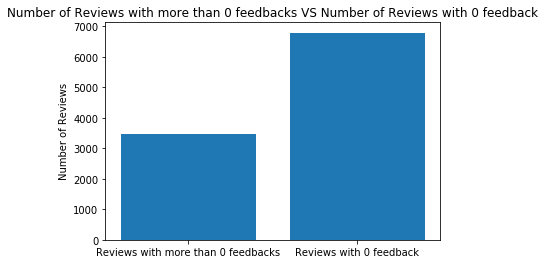

Which graph you want to create?
1. Number of Reviews with more than 0 feedbacks VS Number of Reviews with 0 feedback
2. Bar graph to show Number of Not Useful Reviews VS Number of Useful Reviews
3. Bar graph to show Number of Reviews in helpfulness range of 0.0 to 1.0
4. Overall ratings
5. unixReviewTime
0. Exit
Enter your choice : 2


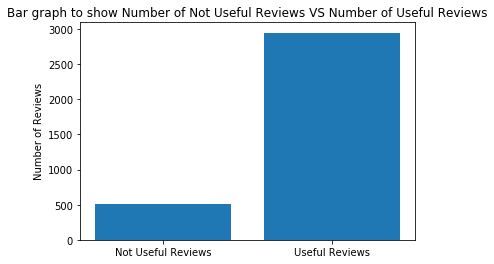

Which graph you want to create?
1. Number of Reviews with more than 0 feedbacks VS Number of Reviews with 0 feedback
2. Bar graph to show Number of Not Useful Reviews VS Number of Useful Reviews
3. Bar graph to show Number of Reviews in helpfulness range of 0.0 to 1.0
4. Overall ratings
5. unixReviewTime
0. Exit
Enter your choice : 3


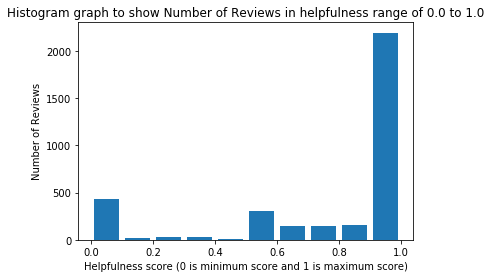

Which graph you want to create?
1. Number of Reviews with more than 0 feedbacks VS Number of Reviews with 0 feedback
2. Bar graph to show Number of Not Useful Reviews VS Number of Useful Reviews
3. Bar graph to show Number of Reviews in helpfulness range of 0.0 to 1.0
4. Overall ratings
5. unixReviewTime
0. Exit
Enter your choice : 5


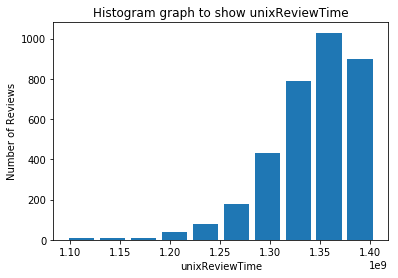

Which graph you want to create?
1. Number of Reviews with more than 0 feedbacks VS Number of Reviews with 0 feedback
2. Bar graph to show Number of Not Useful Reviews VS Number of Useful Reviews
3. Bar graph to show Number of Reviews in helpfulness range of 0.0 to 1.0
4. Overall ratings
5. unixReviewTime
0. Exit
Enter your choice : 0

*********************************************Menu*************************************************
1. To train the model
2. To test the model
3. To save the model to a file
4. To load the model from the file
5. Create Graphs
0. Exit
Enter your choice : 0

Bye!!!!!


In [10]:


# Menu driven program
print("Hi, I am the Robot. You can train me as much as you can. I will learn new things. \n")

while True:
    print()
    print("*********************************************Menu*************************************************")
    print('1. To train the model')
    print('2. To test the model')
    print('3. To save the model to a file')
    print('4. To load the model from the file')
    print('5. Create Graphs')
    print('6. VADER Sentiment analysis')
    print('0. Exit')
    choice = input('Enter your choice : ')
    print()
    if choice == '1':
        while True:
            print("How do you want to train the model")
            print("1. By using dataset file with extension json.gz")
            print("2. By typing review and telling whether it is useful or not")
            print('3. Exit')
            ch = input('Enter your choice : ')
            if ch == "1":
                filename = input('Enter the filename or full path of the dataset : ')
                print('Training...')
                try:
                    model, bow_transformer = train_model_using_dataset(filename)
                    print("Model successfully trained")
                except:
                    print("Invalid file")
                
                break

            elif ch == "2":
                reviewText = input("Please enter the review : ")
                is_useful = input('This review is helpful or not helpful. Please enter 0 for not helpful otherwise it will be treated as helpful.')
                if is_useful == '0':
                    is_useful = 0
                else:
                    is_useful = 1
                model, bow_transformer = train_model_using_artificial_intelligence(model, reviewText, is_useful)
                print("Model successfully trained")
                break
            elif ch == "3":
                break
            else:
                print('Invalid choice. Please try again.')
            
        
        
        
    elif choice == '2':
        comment = input("I will tell you whether the comment will be rated as useful or not. \n Please enter the comment : ")
        X = bow_transformer.transform([comment])
        my_prediction = model.predict(X)
        my_prediction = my_prediction[0]
        if my_prediction == 1:
            print('The comment will be rated as useful')
        else:
            print('The comment will be rated as not useful')
            
    elif choice == '3':
        filename = input('Enter the filename in which you want to save model : ')
        save_Amazon_Reviewer_Model(model, filename)
        print('The model successfully saved to the file')
        
    elif choice == '4':
        filename = input('Enter the filename from which you want to load the model : ')
        model = load_Amazon_Reviewer_Model(filename)
        print('The model successfully loaded from the file')
       
    elif choice == '5':
        filename = input('Enter the filename or full path of the dataset : ')
        df = getDataFrame(filename)
        cleaned_data = []
        reviews_with_zero_feedback = 0
        reviews_with_more_than_zero_feedback = 0

        d = df.T.to_dict().values()
        for data in d:
            if data['helpful'][1] != 0:
                cleaned_data.append(data)
                reviews_with_more_than_zero_feedback += 1
            else:
                reviews_with_zero_feedback += 1
        
        df = pd.DataFrame(cleaned_data)
        
        useful = []
        count_useful = 0
        count_not_useful = 0

        usefulness_scores = []

        for data in cleaned_data:
            score = data['helpful'][0] / data['helpful'][1]
            usefulness_scores.append(score)

            if score < 0.5:
                useful.append(0)
                count_not_useful += 1
            else:
                useful.append(1)
                count_useful += 1

        df['is_useful'] = useful
        
        
        
        while True:
        
            print("Which graph you want to create?")
            print("1. Number of Reviews with more than 0 feedbacks VS Number of Reviews with 0 feedback")
            print("2. Bar graph to show Number of Not Useful Reviews VS Number of Useful Reviews")
            print("3. Bar graph to show Number of Reviews in helpfulness range of 0.0 to 1.0")
            print("4. Overall ratings")
            print("5. unixReviewTime")
            print('0. Exit')
            ch = input('Enter your choice : ')
            if ch == "1":
                
                
                Comments=['Reviews with more than 0 feedbacks','Reviews with 0 feedback']
                countss=[reviews_with_more_than_zero_feedback, reviews_with_zero_feedback]
                xpos = np.arange(len(Comments))
                plt.bar(xpos,countss)

                plt.xticks(xpos,Comments)
                plt.ylabel("Number of Reviews")
                plt.title('Number of Reviews with more than 0 feedbacks VS Number of Reviews with 0 feedback')
                plt.show()


            elif ch == "2":
                Comments=['Not Useful Reviews','Useful Reviews']
                countss=[count_not_useful, count_useful]
                xpos = np.arange(len(Comments))
                plt.bar(xpos,countss)

                plt.xticks(xpos,Comments)
                plt.ylabel("Number of Reviews")
                plt.title('Bar graph to show Number of Not Useful Reviews VS Number of Useful Reviews')
                plt.show()
                
            elif ch == "3":
                plt.hist(usefulness_scores, rwidth=0.82) 
                plt.ylabel("Number of Reviews")
                plt.xlabel("Helpfulness score (0 is minimum score and 1 is maximum score)")
                plt.title('Histogram graph to show Number of Reviews in helpfulness range of 0.0 to 1.0')
                plt.show()
                
            elif ch == "4":
                plt.hist(df['overall'], rwidth=0.82) 
                plt.ylabel("Number of Reviews")
                plt.xlabel("Overall rating")
                plt.title('Histogram graph to show Overall ratings')
                plt.show()
            
            elif ch == "5":
                plt.hist(df['unixReviewTime'], rwidth=0.82) 
                plt.ylabel("Number of Reviews")
                plt.xlabel("unixReviewTime")
                plt.title('Histogram graph to show unixReviewTime')
                plt.show()
            
            
            elif ch == "0":
                break
            else:
                print('Invalid choice. Please try again.')
            
    elif choice == '6':
        textt = input('Please Enter a tweet, review or sentence : ')
        print(get_sentiment(textt))
        break
    
    
    elif choice == '0':
        print("Bye!!!!!")
        break
        
    else:
        print('Invalid choice. Please try again.')
        
    

In [ ]:
# reviews_Musical_Instruments_5.json.gz